In [2]:
df = pd.read_csv('/content/drive/MyDrive/Graduation Admission_CSV/Admission_Predict_Ver1.1.csv')

In [3]:
df.shape

(500, 9)

In [4]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [6]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [7]:
df.duplicated().sum()

0

In [8]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [9]:
df.drop(columns=['Serial No.'],inplace=True)

In [10]:
x = df.iloc[:,0:-1]
y = df.iloc[:,-1]
y.shape
x.shape

(500, 7)

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)

In [12]:
X_train.shape


(400, 7)

In [13]:
X_test.shape

(100, 7)

In [14]:
from sklearn.preprocessing import MinMaxScaler

# Assuming X_train and X_test are DataFrames with the same features
# Make sure X_train and X_test have the same number of features
if X_train.shape[1] != X_test.shape[1]:
    raise ValueError("Number of features in X_train and X_test do not match.")

# Verify feature names if using DataFrames
if list(X_train.columns) != list(X_test.columns):
    raise ValueError("Feature names in X_train and X_test do not match.")

# Use MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [15]:
print("je")

je


In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Create a Sequential model
model = Sequential()

# Add layers to the model
model.add(Dense(7, activation='relu', input_dim=7))
model.add(Dense(7, activation='relu', input_dim=7))
model.add(Dense(1, activation='linear'))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 7)                   │              56 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │              56 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               8 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 120 (480.00 B)

 Trainable params: 120 (480.00 B)

 Non-trainable params: 0 (0.00 B)

In [18]:
model.compile(loss='mean_squared_error',optimizer='Adam',metrics = ['accuracy'])

In [19]:
# history = model.fit(X_train_scaled,y_train,epochs=10,validation_split=0.2)
history = model.fit(X_train_scaled, y_train, epochs=500, validation_split=0.2)


Epoch 1/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 81ms/step - accuracy: 0.0000e+00 - loss: 0.6823 - val_accuracy: 0.0000e+00 - val_loss: 0.6252
Epoch 2/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.0000e+00 - loss: 0.5472 - val_accuracy: 0.0000e+00 - val_loss: 0.5014
Epoch 3/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.0000e+00 - loss: 0.4354 - val_accuracy: 0.0000e+00 - val_loss: 0.4080
Epoch 4/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.0000e+00 - loss: 0.3553 - val_accuracy: 0.0000e+00 - val_loss: 0.3318
Epoch 5/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.0000e+00 - loss: 0.2806 - val_accuracy: 0.0000e+00 - val_loss: 0.2631
Epoch 6/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.0000e+00 - loss: 0.2302 - val_accuracy: 0.0000e+00 - val_loss: 0.2004
Epoch 7/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.0000e+00 - loss: 0.1701 - val_accuracy: 0.0000e+00 - val_loss: 0.1474
Epoch 8/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step

In [22]:
y_pred = model.predict(X_test_scaled)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


In [23]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.8065063480388022

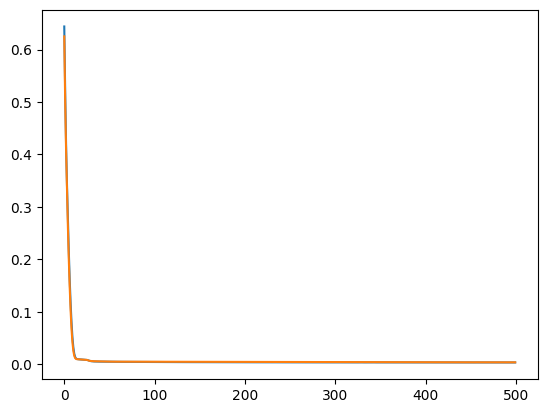

In [24]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])